# Ensemble Energy Data Analysis Case Study- Nikhil Nair

In [1]:
import numpy as np
import pandas as pd

Reading the CSV file locally. Change the csv name for getting data of different devices.
Currently there is only dev1,........,dev6 files

In [2]:
w1= pd.read_csv("dev6.csv", 
                            parse_dates={'timestamp':['TimeStamp']}, 
                            infer_datetime_format=True,
                           )

Summary of Device 1 reading

In [3]:
w1=w1.fillna(0)

w1

,timestamp,variable,value,device
0,2020-07-01 00:00:01.461,MMXN1_Amp,0.0,Device6
1,2020-07-01 00:00:02.970,MMXN1_Amp,0.0,Device6
2,2020-07-01 00:00:05.967,MMXN1_Amp,1026.0,Device6
3,2020-07-01 00:00:08.964,MMXN1_Amp,0.0,Device6
4,2020-07-01 00:00:10.462,MMXN1_Amp,1011.0,Device6
...,...,...,...,...
7718875,2020-07-07 23:49:52.922,WTUR1_W,0.0,Device6
7718876,2020-07-07 23:49:54.421,WTUR1_W,14.0,Device6
7718877,2020-07-07 23:49:55.929,WTUR1_W,0.0,Device6
7718878,2020-07-07 23:49:57.428,WTUR1_W,0.0,Device6


Detailed summary

In [4]:
w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718880 entries, 0 to 7718879
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   variable   object        
 2   value      float64       
 3   device     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 235.6+ MB


Rounding off and removing the nanoseconds field from the datetime64(ns) format

In [5]:
w1['timestamp']=w1['timestamp'].round('s')
w1

,timestamp,variable,value,device
0,2020-07-01 00:00:01,MMXN1_Amp,0.0,Device6
1,2020-07-01 00:00:03,MMXN1_Amp,0.0,Device6
2,2020-07-01 00:00:06,MMXN1_Amp,1026.0,Device6
3,2020-07-01 00:00:09,MMXN1_Amp,0.0,Device6
4,2020-07-01 00:00:10,MMXN1_Amp,1011.0,Device6
...,...,...,...,...
7718875,2020-07-07 23:49:53,WTUR1_W,0.0,Device6
7718876,2020-07-07 23:49:54,WTUR1_W,14.0,Device6
7718877,2020-07-07 23:49:56,WTUR1_W,0.0,Device6
7718878,2020-07-07 23:49:57,WTUR1_W,0.0,Device6



The 'variable' column contains key metrics of the wind turbine, we need to pivot the table, so that 'value' columns corresponds to each unique 'variable'.
Before we get to this, we need to clean the table by removing any duplicate value of 'timestamp' and 'value' combined.
Below steps will indicate, how we will go about it.

In [6]:
w1=w1.drop_duplicates(subset=['timestamp','variable'], keep='last')

In [7]:
w2=w1.pivot(index=['timestamp'], columns='variable', values='value')


As you can see we get the perfomance metrics as columns and the table is a bit cleaner and easier to understand.
This builds the base for our data analysis.

Also see a lot of 0s in our dataframe. This does not depict the ideal behaviour of an active sensor. Here we are assuming that once the sensor takes a reading, it stays there until a change has occured. 

In [8]:
w2=w2.mask(w2 == 0).ffill()
w2=w2.fillna(0)
w2

variable,MMXN1_Amp,MMXN1_Vol,MMXU1_TotPF,WGEN1_GnBrg1,WGEN1_GnBrg2,WGEN1_GnTmpSta,WGEN1_Spd,WNAC1_Dir,WNAC1_ExTmp,WNAC1_IntlTmp,...,WROT1_RotSpd,WTRF1_TrfTmpCell,WTRF1_TrfTmpWdg,WTRM1_GbxSpd,WTUR1_TotVArh,WTUR1_TotWh,WTUR1_TurSt_actSt,WTUR1_VA,WTUR1_Var,WTUR1_W
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
2020-07-01 00:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
2020-07-01 00:00:06,1026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1023.0,18.0,1023.0
2020-07-01 00:00:09,1026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1023.0,18.0,1023.0
2020-07-01 00:00:10,1011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1008.0,18.0,1008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:49:53,38.0,332.0,1.0,42.0,45.0,62.0,15.0,240.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,35.0,25.0,24.0
2020-07-07 23:49:54,32.0,332.0,1.0,42.0,45.0,62.0,15.0,240.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,27.0,22.0,14.0
2020-07-07 23:49:56,32.0,332.0,1.0,42.0,45.0,62.0,15.0,240.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,27.0,22.0,14.0




Now we are getting to closer to the first task of the assignment.
As you can see, the timestamp field is a bit unordered. Readings are sampled at arbitrary times during the week.
This is due to the not-so-perfect recordings by the sensor at the field or due to other miscellanous reasons.
We need some structure and uniformity here.

Since we have been provided by finer timestamps, lets make it coarser by upsampling the data given by 10 minutes.
Upsampling, considers a specific time interval and 

In the subsequent code blocks, we will build dataframes for mean, min, max, last and std. deviation in quantums of 10 minutes.

For 1min, 5 min and other aggregates, change the rule attribute in resample.

In [9]:
df1 = w2.resample(rule='10Min').mean()
df1.columns=[str(col) + '_Avg' for col in df1.columns]
df1

,MMXN1_Amp_Avg,MMXN1_Vol_Avg,MMXU1_TotPF_Avg,WGEN1_GnBrg1_Avg,WGEN1_GnBrg2_Avg,WGEN1_GnTmpSta_Avg,WGEN1_Spd_Avg,WNAC1_Dir_Avg,WNAC1_ExTmp_Avg,WNAC1_IntlTmp_Avg,...,WROT1_RotSpd_Avg,WTRF1_TrfTmpCell_Avg,WTRF1_TrfTmpWdg_Avg,WTRM1_GbxSpd_Avg,WTUR1_TotVArh_Avg,WTUR1_TotWh_Avg,WTUR1_TurSt_actSt_Avg,WTUR1_VA_Avg,WTUR1_Var_Avg,WTUR1_W_Avg
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,1263.141176,262.917647,0.0,0.000000,0.000000,44.007843,6.498039,0.000000,0.0,0.000000,...,0.0,0.0,0.0,6.498039,0.0,0.0,0.000000,1261.490196,16.168627,1261.498039
2020-07-01 00:10:00,1123.860000,331.640000,0.0,0.000000,0.000000,69.376000,22.728000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,22.728000,0.0,0.0,0.000000,1120.544000,17.168000,1120.572000
2020-07-01 00:20:00,974.817121,331.365759,0.0,0.000000,0.000000,70.000000,21.867704,152.992218,0.0,0.000000,...,0.0,0.0,0.0,21.867704,0.0,0.0,0.000000,970.272374,17.178988,970.108949
2020-07-01 00:30:00,811.814516,331.000000,0.0,0.000000,0.000000,69.116935,20.907258,231.000000,0.0,0.000000,...,0.0,0.0,0.0,20.907258,0.0,0.0,0.000000,807.625000,17.850806,807.104839
2020-07-01 00:40:00,547.857143,331.693277,0.0,0.000000,0.000000,68.130252,18.567227,231.000000,0.0,0.000000,...,0.0,0.0,0.0,18.567227,0.0,0.0,0.000000,544.886555,18.794118,544.504202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,47.860377,330.000000,1.0,43.000000,46.000000,63.000000,11.483019,243.864151,33.0,35.109434,...,0.0,0.0,0.0,11.471698,0.0,0.0,2.660377,42.701887,14.400000,27.007547
2020-07-07 23:10:00,55.944000,330.000000,1.0,43.000000,46.000000,63.056000,15.000000,243.040000,33.0,34.180000,...,0.0,0.0,0.0,15.000000,0.0,0.0,3.000000,50.988000,20.780000,37.580000
2020-07-07 23:20:00,50.527881,330.282528,1.0,43.000000,46.000000,62.639405,8.776952,229.933086,33.0,34.000000,...,0.0,0.0,0.0,8.776952,0.0,0.0,2.520446,45.226766,13.364312,26.182156


In [10]:
df2 = w2.resample(rule='10Min').min()
df2.columns=[str(col) + '_Min' for col in df2.columns]
df2

,MMXN1_Amp_Min,MMXN1_Vol_Min,MMXU1_TotPF_Min,WGEN1_GnBrg1_Min,WGEN1_GnBrg2_Min,WGEN1_GnTmpSta_Min,WGEN1_Spd_Min,WNAC1_Dir_Min,WNAC1_ExTmp_Min,WNAC1_IntlTmp_Min,...,WROT1_RotSpd_Min,WTRF1_TrfTmpCell_Min,WTRF1_TrfTmpWdg_Min,WTRM1_GbxSpd_Min,WTUR1_TotVArh_Min,WTUR1_TotWh_Min,WTUR1_TurSt_actSt_Min,WTUR1_VA_Min,WTUR1_Var_Min,WTUR1_W_Min
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
2020-07-01 00:10:00,760.0,331.0,0.0,0.0,0.0,69.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,756.0,13.0,755.0
2020-07-01 00:20:00,580.0,331.0,0.0,0.0,0.0,70.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,575.0,3.0,575.0
2020-07-01 00:30:00,510.0,331.0,0.0,0.0,0.0,69.0,19.0,231.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,509.0,13.0,507.0
2020-07-01 00:40:00,386.0,331.0,0.0,0.0,0.0,67.0,17.0,231.0,0.0,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,384.0,13.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,9.0,330.0,1.0,43.0,46.0,63.0,3.0,242.0,33.0,35.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,5.0,-6.0,-36.0
2020-07-07 23:10:00,20.0,330.0,1.0,43.0,46.0,63.0,15.0,229.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,4.0,2.0,-35.0
2020-07-07 23:20:00,9.0,330.0,1.0,43.0,46.0,62.0,1.0,220.0,33.0,34.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,-14.0,-58.0


In [11]:
df3 = w2.resample(rule='10Min').max()
df3.columns=[str(col) + '_Max' for col in df3.columns]
df3

,MMXN1_Amp_Max,MMXN1_Vol_Max,MMXU1_TotPF_Max,WGEN1_GnBrg1_Max,WGEN1_GnBrg2_Max,WGEN1_GnTmpSta_Max,WGEN1_Spd_Max,WNAC1_Dir_Max,WNAC1_ExTmp_Max,WNAC1_IntlTmp_Max,...,WROT1_RotSpd_Max,WTRF1_TrfTmpCell_Max,WTRF1_TrfTmpWdg_Max,WTRM1_GbxSpd_Max,WTUR1_TotVArh_Max,WTUR1_TotWh_Max,WTUR1_TurSt_actSt_Max,WTUR1_VA_Max,WTUR1_Var_Max,WTUR1_W_Max
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,1969.0,332.0,0.0,0.0,0.0,69.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,1970.0,19.0,1969.0
2020-07-01 00:10:00,1681.0,333.0,0.0,0.0,0.0,70.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,1683.0,21.0,1682.0
2020-07-01 00:20:00,1849.0,332.0,0.0,0.0,0.0,70.0,23.0,241.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,1844.0,22.0,1845.0
2020-07-01 00:30:00,1313.0,331.0,0.0,0.0,0.0,70.0,23.0,231.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,1309.0,21.0,1308.0
2020-07-01 00:40:00,796.0,332.0,0.0,0.0,0.0,69.0,20.0,231.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,800.0,24.0,795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,218.0,330.0,1.0,43.0,46.0,63.0,15.0,258.0,33.0,36.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,216.0,42.0,215.0
2020-07-07 23:10:00,254.0,330.0,1.0,43.0,46.0,64.0,15.0,258.0,33.0,35.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,251.0,28.0,250.0
2020-07-07 23:20:00,275.0,332.0,1.0,43.0,46.0,63.0,15.0,248.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,6.0,272.0,41.0,272.0


In [12]:
df4 = w2.resample(rule='10Min').last()
df4.columns=[str(col) + '_Last' for col in df4.columns]
df4

,MMXN1_Amp_Last,MMXN1_Vol_Last,MMXU1_TotPF_Last,WGEN1_GnBrg1_Last,WGEN1_GnBrg2_Last,WGEN1_GnTmpSta_Last,WGEN1_Spd_Last,WNAC1_Dir_Last,WNAC1_ExTmp_Last,WNAC1_IntlTmp_Last,...,WROT1_RotSpd_Last,WTRF1_TrfTmpCell_Last,WTRF1_TrfTmpWdg_Last,WTRM1_GbxSpd_Last,WTUR1_TotVArh_Last,WTUR1_TotWh_Last,WTUR1_TurSt_actSt_Last,WTUR1_VA_Last,WTUR1_Var_Last,WTUR1_W_Last
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,1164.0,331.0,0.0,0.0,0.0,69.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,1162.0,18.0,1161.0
2020-07-01 00:10:00,840.0,331.0,0.0,0.0,0.0,70.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,832.0,17.0,834.0
2020-07-01 00:20:00,638.0,331.0,0.0,0.0,0.0,70.0,21.0,231.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,637.0,20.0,636.0
2020-07-01 00:30:00,519.0,331.0,0.0,0.0,0.0,69.0,19.0,231.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,518.0,19.0,517.0
2020-07-01 00:40:00,648.0,332.0,0.0,0.0,0.0,67.0,19.0,231.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,646.0,18.0,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,115.0,330.0,1.0,43.0,46.0,63.0,15.0,242.0,33.0,35.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,113.0,25.0,111.0
2020-07-07 23:10:00,35.0,330.0,1.0,43.0,46.0,63.0,15.0,229.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,31.0,25.0,19.0
2020-07-07 23:20:00,41.0,332.0,1.0,43.0,46.0,62.0,15.0,240.0,33.0,34.0,...,0.0,0.0,0.0,15.0,0.0,0.0,3.0,38.0,25.0,29.0


In [13]:
df5 = w2.resample(rule='10Min').std()
df5.columns=[str(col) + '_StdDev' for col in df5.columns]
df5

,MMXN1_Amp_StdDev,MMXN1_Vol_StdDev,MMXU1_TotPF_StdDev,WGEN1_GnBrg1_StdDev,WGEN1_GnBrg2_StdDev,WGEN1_GnTmpSta_StdDev,WGEN1_Spd_StdDev,WNAC1_Dir_StdDev,WNAC1_ExTmp_StdDev,WNAC1_IntlTmp_StdDev,...,WROT1_RotSpd_StdDev,WTRF1_TrfTmpCell_StdDev,WTRF1_TrfTmpWdg_StdDev,WTRM1_GbxSpd_StdDev,WTUR1_TotVArh_StdDev,WTUR1_TotWh_StdDev,WTUR1_TurSt_actSt_StdDev,WTUR1_VA_StdDev,WTUR1_Var_StdDev,WTUR1_W_StdDev
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,281.075738,134.938558,0.0,0.000000,0.000000,33.128358,10.283338,0.000000,0.0,0.000000,...,0.0,0.0,0.0,10.283338,0.0,0.0,0.000000,282.421975,1.824752,282.423634
2020-07-01 00:10:00,208.991978,0.558253,0.0,0.000000,0.000000,0.485352,0.496995,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.496995,0.0,0.0,0.000000,209.669390,1.421216,209.648254
2020-07-01 00:20:00,247.674389,0.482582,0.0,0.000000,0.000000,0.000000,0.991176,109.666611,0.0,0.000000,...,0.0,0.0,0.0,0.991176,0.0,0.0,0.000000,247.722035,3.088390,247.844213
2020-07-01 00:30:00,189.969095,0.000000,0.0,0.000000,0.000000,0.321993,1.225351,0.000000,0.0,0.000000,...,0.0,0.0,0.0,1.225351,0.0,0.0,0.000000,189.394092,1.293834,189.463971
2020-07-01 00:40:00,100.283167,0.462105,0.0,0.000000,0.000000,0.523548,0.812415,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.812415,0.0,0.0,0.000000,99.944076,1.672452,100.813223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,46.120553,0.000000,0.0,0.000000,0.000000,0.000000,5.294427,4.928700,0.0,0.312774,...,0.0,0.0,0.0,5.290084,0.0,0.0,0.752355,47.946919,12.643959,54.925155
2020-07-07 23:10:00,38.036192,0.000000,0.0,0.000000,0.000000,0.230383,0.000000,11.668376,0.0,0.384958,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,39.989404,4.850744,48.107180
2020-07-07 23:20:00,59.549210,0.697886,0.0,0.000000,0.000000,0.481068,6.447439,8.222375,0.0,0.000000,...,0.0,0.0,0.0,6.447439,0.0,0.0,1.111570,60.967056,11.624135,69.486337


For the completion of the first task, let's combine the aggregrate measures we took earlier.
This is done by concatenating all the previous code blocks.

In [14]:
df=pd.concat([df1, df2, df3,df4,df5], axis=1)
df['device']=w1['device'].iloc[0]
df

,MMXN1_Amp_Avg,MMXN1_Vol_Avg,MMXU1_TotPF_Avg,WGEN1_GnBrg1_Avg,WGEN1_GnBrg2_Avg,WGEN1_GnTmpSta_Avg,WGEN1_Spd_Avg,WNAC1_Dir_Avg,WNAC1_ExTmp_Avg,WNAC1_IntlTmp_Avg,...,WTRF1_TrfTmpCell_StdDev,WTRF1_TrfTmpWdg_StdDev,WTRM1_GbxSpd_StdDev,WTUR1_TotVArh_StdDev,WTUR1_TotWh_StdDev,WTUR1_TurSt_actSt_StdDev,WTUR1_VA_StdDev,WTUR1_Var_StdDev,WTUR1_W_StdDev,device
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,1263.141176,262.917647,0.0,0.000000,0.000000,44.007843,6.498039,0.000000,0.0,0.000000,...,0.0,0.0,10.283338,0.0,0.0,0.000000,282.421975,1.824752,282.423634,Device6
2020-07-01 00:10:00,1123.860000,331.640000,0.0,0.000000,0.000000,69.376000,22.728000,0.000000,0.0,0.000000,...,0.0,0.0,0.496995,0.0,0.0,0.000000,209.669390,1.421216,209.648254,Device6
2020-07-01 00:20:00,974.817121,331.365759,0.0,0.000000,0.000000,70.000000,21.867704,152.992218,0.0,0.000000,...,0.0,0.0,0.991176,0.0,0.0,0.000000,247.722035,3.088390,247.844213,Device6
2020-07-01 00:30:00,811.814516,331.000000,0.0,0.000000,0.000000,69.116935,20.907258,231.000000,0.0,0.000000,...,0.0,0.0,1.225351,0.0,0.0,0.000000,189.394092,1.293834,189.463971,Device6
2020-07-01 00:40:00,547.857143,331.693277,0.0,0.000000,0.000000,68.130252,18.567227,231.000000,0.0,0.000000,...,0.0,0.0,0.812415,0.0,0.0,0.000000,99.944076,1.672452,100.813223,Device6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,47.860377,330.000000,1.0,43.000000,46.000000,63.000000,11.483019,243.864151,33.0,35.109434,...,0.0,0.0,5.290084,0.0,0.0,0.752355,47.946919,12.643959,54.925155,Device6
2020-07-07 23:10:00,55.944000,330.000000,1.0,43.000000,46.000000,63.056000,15.000000,243.040000,33.0,34.180000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,39.989404,4.850744,48.107180,Device6
2020-07-07 23:20:00,50.527881,330.282528,1.0,43.000000,46.000000,62.639405,8.776952,229.933086,33.0,34.000000,...,0.0,0.0,6.447439,0.0,0.0,1.111570,60.967056,11.624135,69.486337,Device6


Lets convert timestamp and add a column for Los Angeles time zone 

In [15]:
df['timestamp_z']=df.index.tz_localize('UTC').tz_convert('America/Los_Angeles')
df['timestamp_z']

timestamp
2020-07-01 00:00:00   2020-06-30 17:00:00-07:00
2020-07-01 00:10:00   2020-06-30 17:10:00-07:00
2020-07-01 00:20:00   2020-06-30 17:20:00-07:00
2020-07-01 00:30:00   2020-06-30 17:30:00-07:00
2020-07-01 00:40:00   2020-06-30 17:40:00-07:00
                                 ...           
2020-07-07 23:00:00   2020-07-07 16:00:00-07:00
2020-07-07 23:10:00   2020-07-07 16:10:00-07:00
2020-07-07 23:20:00   2020-07-07 16:20:00-07:00
2020-07-07 23:30:00   2020-07-07 16:30:00-07:00
2020-07-07 23:40:00   2020-07-07 16:40:00-07:00
Freq: 10T, Name: timestamp_z, Length: 1007, dtype: datetime64[ns, America/Los_Angeles]

In [16]:
df

,MMXN1_Amp_Avg,MMXN1_Vol_Avg,MMXU1_TotPF_Avg,WGEN1_GnBrg1_Avg,WGEN1_GnBrg2_Avg,WGEN1_GnTmpSta_Avg,WGEN1_Spd_Avg,WNAC1_Dir_Avg,WNAC1_ExTmp_Avg,WNAC1_IntlTmp_Avg,...,WTRF1_TrfTmpWdg_StdDev,WTRM1_GbxSpd_StdDev,WTUR1_TotVArh_StdDev,WTUR1_TotWh_StdDev,WTUR1_TurSt_actSt_StdDev,WTUR1_VA_StdDev,WTUR1_Var_StdDev,WTUR1_W_StdDev,device,timestamp_z
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:00,1263.141176,262.917647,0.0,0.000000,0.000000,44.007843,6.498039,0.000000,0.0,0.000000,...,0.0,10.283338,0.0,0.0,0.000000,282.421975,1.824752,282.423634,Device6,2020-06-30 17:00:00-07:00
2020-07-01 00:10:00,1123.860000,331.640000,0.0,0.000000,0.000000,69.376000,22.728000,0.000000,0.0,0.000000,...,0.0,0.496995,0.0,0.0,0.000000,209.669390,1.421216,209.648254,Device6,2020-06-30 17:10:00-07:00
2020-07-01 00:20:00,974.817121,331.365759,0.0,0.000000,0.000000,70.000000,21.867704,152.992218,0.0,0.000000,...,0.0,0.991176,0.0,0.0,0.000000,247.722035,3.088390,247.844213,Device6,2020-06-30 17:20:00-07:00
2020-07-01 00:30:00,811.814516,331.000000,0.0,0.000000,0.000000,69.116935,20.907258,231.000000,0.0,0.000000,...,0.0,1.225351,0.0,0.0,0.000000,189.394092,1.293834,189.463971,Device6,2020-06-30 17:30:00-07:00
2020-07-01 00:40:00,547.857143,331.693277,0.0,0.000000,0.000000,68.130252,18.567227,231.000000,0.0,0.000000,...,0.0,0.812415,0.0,0.0,0.000000,99.944076,1.672452,100.813223,Device6,2020-06-30 17:40:00-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 23:00:00,47.860377,330.000000,1.0,43.000000,46.000000,63.000000,11.483019,243.864151,33.0,35.109434,...,0.0,5.290084,0.0,0.0,0.752355,47.946919,12.643959,54.925155,Device6,2020-07-07 16:00:00-07:00
2020-07-07 23:10:00,55.944000,330.000000,1.0,43.000000,46.000000,63.056000,15.000000,243.040000,33.0,34.180000,...,0.0,0.000000,0.0,0.0,0.000000,39.989404,4.850744,48.107180,Device6,2020-07-07 16:10:00-07:00
2020-07-07 23:20:00,50.527881,330.282528,1.0,43.000000,46.000000,62.639405,8.776952,229.933086,33.0,34.000000,...,0.0,6.447439,0.0,0.0,1.111570,60.967056,11.624135,69.486337,Device6,2020-07-07 16:20:00-07:00


From here, we can start the second task of data viz. Now plot feature of matplotlib is piggybacked in pandas, so we can directly plot the graph of 'WNAC1_WdSpd_Avg' vs 'WTUR1_W_Avg' without importing the matplotlib library

<AxesSubplot:xlabel='WNAC1_WdSpd_Avg', ylabel='WTUR1_W_Avg'>

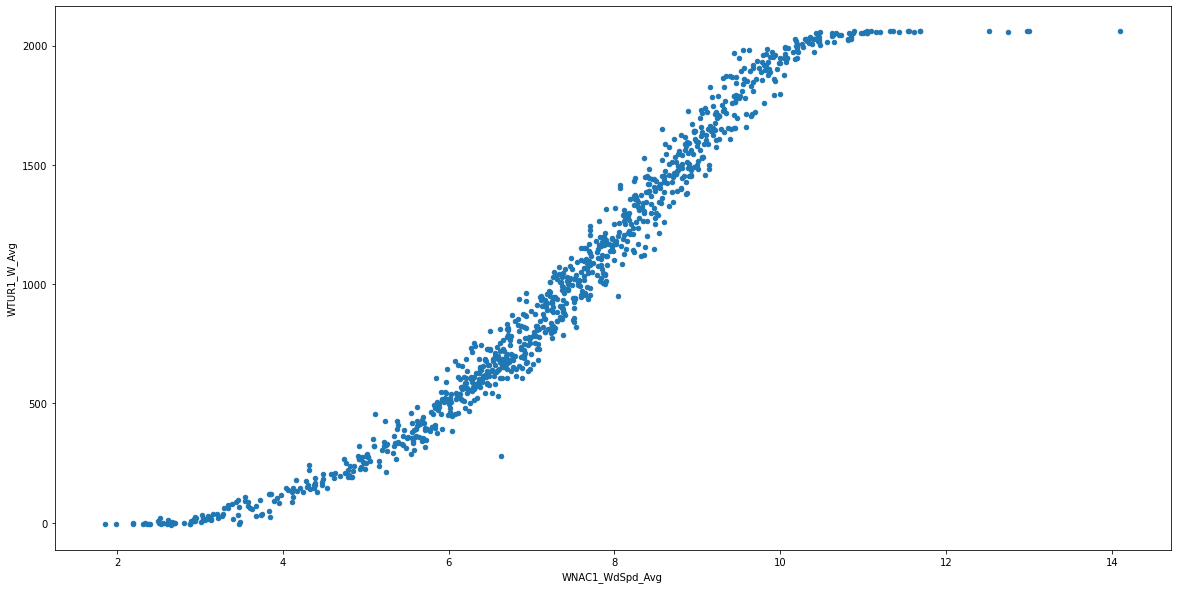

In [17]:
df.plot.scatter(x='WNAC1_WdSpd_Avg', y='WTUR1_W_Avg', figsize=(20,10))

<AxesSubplot:xlabel='timestamp'>

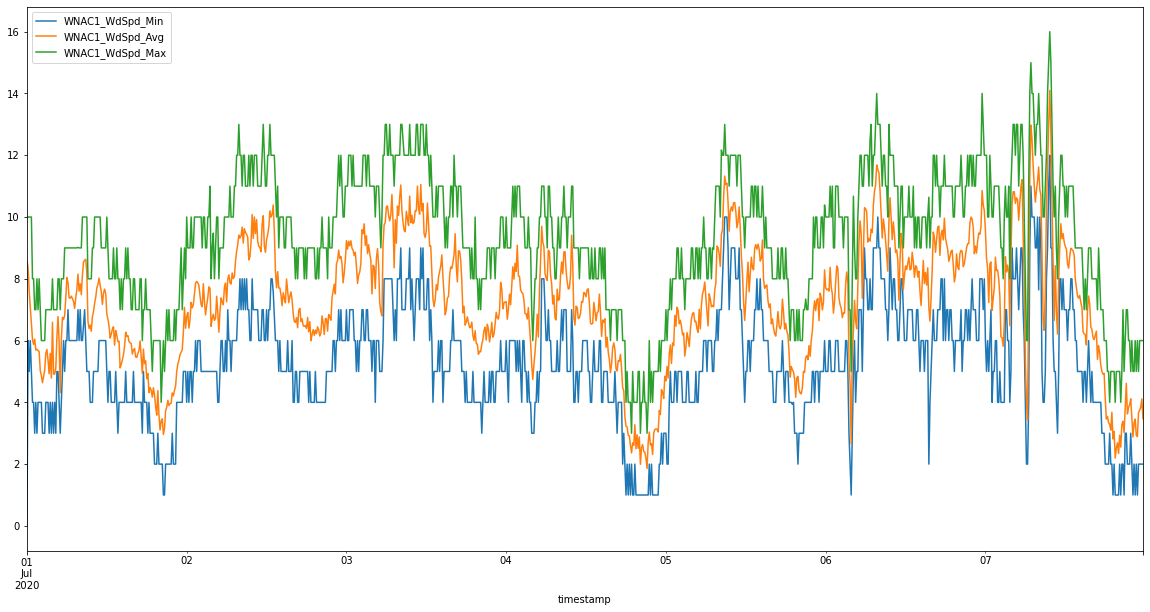

In [34]:
df[['WNAC1_WdSpd_Min','WNAC1_WdSpd_Avg','WNAC1_WdSpd_Max']].plot(figsize=(20,10))